In [1]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import glob
import gsw
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import os


In [2]:
path_files_soda_raw = '/glade/work/jhayron/Data4Predictability/SODA_ICE/'

In [3]:
files = np.sort(glob.glob(path_files_soda_raw+'*.nc'))

In [40]:
def cut_and_select(ds, var_name, lat_range, lon_range):
    """
    Cut a rectangular region defined by latitude and longitude ranges from a dataset, and
    select one variable of interest.

    Parameters
    ----------
    ds : xarray.Dataset
        The input dataset containing the variable of interest and the latitude and longitude
        coordinates.
    var_name : str
        The name of the variable to select.
    lat_range : tuple of two floats
        The latitude range to cut, defined as (min_lat, max_lat).
    lon_range : tuple of two floats
        The longitude range to cut, defined as (min_lon, max_lon).

    Returns
    -------
    xarray.Dataset
        A new dataset containing only the selected variable, with the corresponding latitude
        and longitude coordinates.
    """
    # Select the variable of interest
    var = ds[var_name]

    # Cut the rectangular region based on the latitude and longitude ranges
    var_cut = var.sel(yt=slice(lat_range[0], lat_range[1]), xt=slice(lon_range[0], lon_range[1]))

    # Create a new dataset with only the selected variable and its coordinates
    ds_var = xr.Dataset({var_name: var_cut})

    return ds_var

def plot_map(ds, varname, longname='', cmap='YlOrRd', cbar_label=None, vmin=None, vmax=None):
    """
    Plots a global map of a given variable in the dataset.

    Parameters
    ----------
    ds : xarray.Dataset
        The input dataset containing the variable to be plotted.
    varname : str
        The name of the variable to be plotted.
    cmap : str or Colormap, optional
        The colormap to use in the plot. Defaults to 'YlOrRd'.
    cbar_label : str, optional
        The label to use for the colorbar. If not provided, the units of the variable in the dataset
        will be used.
    vmin : float, optional
        The minimum value to be plotted. If not provided, the minimum value in the data will be used.
    vmax : float, optional
        The maximum value to be plotted. If not provided, the maximum value in the data will be used.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting figure object.

    """
    # Extract data
    var = ds[varname]
    lat = ds['yt']
    lon = ds['xt']

    # Set up the projection and plot the data
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    p = ax.pcolormesh(lon, lat, var[0], cmap=cmap, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)

    # Set up the colorbar
    if cbar_label is None:
        cbar_label = f"({var.units})"
    cbar = plt.colorbar(p, ax=ax, orientation='horizontal', shrink=0.5, pad=0.1)
    cbar.ax.set_xlabel(cbar_label)

    # Add coastlines and gridlines
    ax.coastlines()
    ax.gridlines(draw_labels=True)

    # Set the title
    ax.set_title(f"{longname}")
    plt.show()
    # return fig


In [14]:
path_outputs = '/glade/u/home/jhayron/TemporalDataWR/SODA_Ice/'

In [16]:
ds = xr.open_dataset(files[0])

In [46]:
for i in range(len(files)):
    print(files[i])
    ds = xr.open_dataset(files[i])
    lat_range = (-30,90)
    lon_range = (0,360)

    if os.path.exists(path_outputs+f'IT/') == False:
        os.mkdir(path_outputs+f'IT/')

    it = cut_and_select(ds, 'hi', lat_range, lon_range)
    output_path =  path_outputs+f'IT/'+files[i].split('/')[-1].replace('soda3.15.2_5dy_ice_reg',f'IT')
    it.to_netcdf(output_path)
    
    if os.path.exists(path_outputs+f'IC/') == False:
        os.mkdir(path_outputs+f'IC/')

    cn1 = cut_and_select(ds, 'cn1', lat_range, lon_range)
    cn2 = cut_and_select(ds, 'cn2', lat_range, lon_range)
    cn3 = cut_and_select(ds, 'cn3', lat_range, lon_range)
    cn4 = cut_and_select(ds, 'cn4', lat_range, lon_range)
    cn5 = cut_and_select(ds, 'cn5', lat_range, lon_range)
    
    ic = xr.Dataset({'cn_total': cn1.cn1+cn2.cn2+cn3.cn3+cn4.cn4+cn5.cn5})
    ic.cn_total.attrs['units'] = 'concentration'
    
    output_path =  path_outputs+f'IC/'+files[i].split('/')[-1].replace('soda3.15.2_5dy_ice_reg',f'IC')
    ic.to_netcdf(output_path)

/glade/work/jhayron/Data4Predictability/SODA_ICE/soda3.15.2_5dy_ice_reg_1980_02_02.nc
/glade/work/jhayron/Data4Predictability/SODA_ICE/soda3.15.2_5dy_ice_reg_1980_02_07.nc
/glade/work/jhayron/Data4Predictability/SODA_ICE/soda3.15.2_5dy_ice_reg_1980_02_12.nc
/glade/work/jhayron/Data4Predictability/SODA_ICE/soda3.15.2_5dy_ice_reg_1980_02_17.nc
/glade/work/jhayron/Data4Predictability/SODA_ICE/soda3.15.2_5dy_ice_reg_1980_02_22.nc
/glade/work/jhayron/Data4Predictability/SODA_ICE/soda3.15.2_5dy_ice_reg_1980_02_27.nc
/glade/work/jhayron/Data4Predictability/SODA_ICE/soda3.15.2_5dy_ice_reg_1980_03_03.nc
/glade/work/jhayron/Data4Predictability/SODA_ICE/soda3.15.2_5dy_ice_reg_1980_03_08.nc
/glade/work/jhayron/Data4Predictability/SODA_ICE/soda3.15.2_5dy_ice_reg_1980_03_13.nc
/glade/work/jhayron/Data4Predictability/SODA_ICE/soda3.15.2_5dy_ice_reg_1980_03_18.nc
/glade/work/jhayron/Data4Predictability/SODA_ICE/soda3.15.2_5dy_ice_reg_1980_03_23.nc
/glade/work/jhayron/Data4Predictability/SODA_ICE/soda3

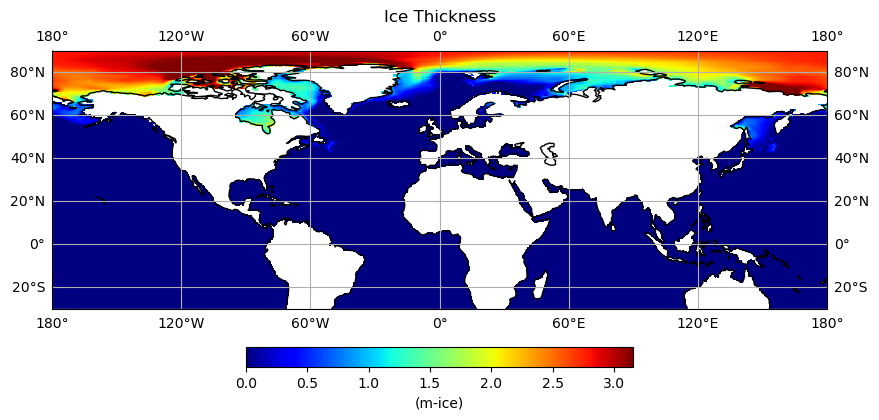

In [37]:
plot_map(it, 'hi', 'Ice Thickness', cmap='jet')

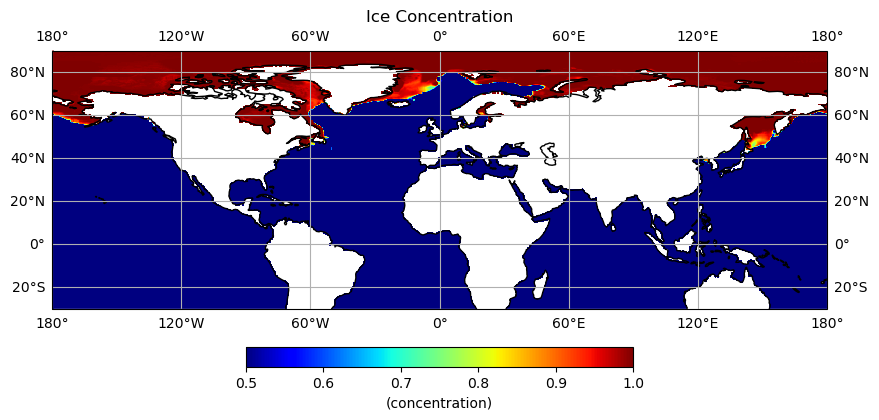

In [41]:
plot_map(ic, 'cn_total', 'Ice Concentration', cmap='jet',vmin=0.5,vmax=1)